<div style='font-size:36px; font-weight:bold; text-align:center;'>NBA 2021-22 season data analysis</div>

<img style='display: block; margin-left: auto; margin-right: auto; width: 50%;' src='https://logospng.org/download/nba/logo-nba-256.png'>

In this notebook i'm going to grab data from the nba 2021-22 season analyze, plot and answer some interesting questions.

I'm going to web scrap from a site called basketball-reference, so shout out to them!

<hr>

First import all libs needed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
url = 'https://www.basketball-reference.com/leagues/NBA_2022_per_game.html'
df = pd.read_html(url)[0]
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
838,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
839,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
840,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


There's some cleaning in this data frame to do and you will see why

In [3]:
df.set_index('Rk', inplace=True)
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,.439,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,.547,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,.557,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,.402,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,.550,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,.465,...,.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,.460,...,.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,.526,...,.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3


In [4]:
df.iloc[20:30]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
17,Ryan Arcidiacono,PG,27,NYK,10,0,7.6,0.6,1.2,.500,...,NaN,0.0,0.8,0.8,0.4,0.1,0.0,0.3,0.5,1.6
18,Trevor Ariza,SF,36,LAL,24,11,19.3,1.4,4.1,.333,...,.556,0.4,3.0,3.4,1.1,0.5,0.3,0.5,0.8,4.0
19,D.J. Augustin,PG,34,TOT,55,2,16.1,1.7,4.0,.423,...,.884,0.2,1.0,1.2,1.9,0.3,0.0,1.0,0.7,5.3
19,D.J. Augustin,PG,34,HOU,34,2,15.0,1.6,4.0,.404,...,.868,0.2,1.0,1.2,2.2,0.3,0.0,1.3,0.5,5.4
19,D.J. Augustin,PG,34,LAL,21,0,17.8,1.9,4.1,.453,...,1.000,0.2,1.1,1.3,1.6,0.3,0.0,0.5,1.0,5.3
20,Deni Avdija,SF,21,WAS,82,8,24.2,3.0,7.1,.432,...,.757,0.6,4.5,5.2,2.0,0.7,0.5,1.1,2.3,8.4
Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
21,Joel Ayayi,SG,21,WAS,7,0,2.9,0.1,0.9,.167,...,NaN,0.1,0.3,0.4,0.6,0.0,0.0,0.0,0.0,0.3
22,Deandre Ayton,C,23,PHO,58,58,29.5,7.6,12.0,.634,...,.746,2.6,7.7,10.2,1.4,0.7,0.7,1.6,2.4,17.2


We don't want that divider in row 21

In [5]:
df = df[df.PTS != 'PTS']
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,.439,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,.547,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,.557,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,.402,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,.550,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,.465,...,.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,.460,...,.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,.526,...,.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3


This dropped 30 rows, but as you can see, there still more rows than players.

This is because some players are traded in the middle of the season and basketball-referece tracks stats from them on each team and the total for the season.

But in this analysis we only going to need the total, because otherwise it would affect the plots

In [6]:
df.iloc[10:20]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
9,Jose Alvarado,PG,23,NOP,54,1,15.4,2.4,5.4,.446,...,.679,0.5,1.4,1.9,2.8,1.3,0.1,0.7,1.4,6.1
10,Justin Anderson,SF,28,TOT,16,6,19.8,2.3,5.9,.379,...,.789,0.3,2.6,2.9,2.1,0.5,0.4,0.5,1.4,6.4
10,Justin Anderson,SF,28,CLE,3,0,15.7,1.3,2.7,.500,...,.750,0.0,2.0,2.0,2.0,0.3,0.0,0.7,1.3,4.3
10,Justin Anderson,SF,28,IND,13,6,20.7,2.5,6.7,.368,...,.800,0.3,2.8,3.1,2.1,0.5,0.5,0.5,1.4,6.8
11,Kyle Anderson,PF,28,MEM,69,11,21.5,3.0,6.8,.446,...,.638,1.0,4.3,5.3,2.7,1.1,0.7,1.0,1.6,7.6
12,Giannis Antetokounmpo,PF,27,MIL,67,67,32.9,10.3,18.6,.553,...,.722,2.0,9.6,11.6,5.8,1.1,1.4,3.3,3.2,29.9
13,Thanasis Antetokounmpo,SF,29,MIL,48,6,9.9,1.5,2.7,.547,...,.630,0.8,1.3,2.1,0.5,0.3,0.3,0.5,1.4,3.6
14,Carmelo Anthony,PF,37,LAL,69,3,26.0,4.6,10.5,.441,...,.830,0.9,3.3,4.2,1.0,0.7,0.8,0.9,2.4,13.3
15,Cole Anthony,PG,21,ORL,65,65,31.7,5.5,14.0,.391,...,.854,0.5,4.9,5.4,5.7,0.7,0.3,2.6,2.6,16.3


Here, we can see 3 Justin Anderson, we going to drop it the CLE and IND ones

In [7]:
df = df.drop_duplicates('Player')
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,.439,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,.547,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,.557,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,.402,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,.550,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,.518,...,.469,1.5,2.5,4.0,2.0,1.0,0.3,1.0,1.6,6.2
602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,.460,...,.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,.526,...,.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3


In [8]:
df.iloc[5:15]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
6,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,.372,...,.743,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6
7,Grayson Allen,SG,26,MIL,66,61,27.3,3.9,8.6,.448,...,.865,0.5,2.9,3.4,1.5,0.7,0.3,0.7,1.5,11.1
8,Jarrett Allen,C,23,CLE,56,56,32.3,6.6,9.7,.677,...,.708,3.4,7.3,10.8,1.6,0.8,1.3,1.7,1.7,16.1
9,Jose Alvarado,PG,23,NOP,54,1,15.4,2.4,5.4,.446,...,.679,0.5,1.4,1.9,2.8,1.3,0.1,0.7,1.4,6.1
10,Justin Anderson,SF,28,TOT,16,6,19.8,2.3,5.9,.379,...,.789,0.3,2.6,2.9,2.1,0.5,0.4,0.5,1.4,6.4
11,Kyle Anderson,PF,28,MEM,69,11,21.5,3.0,6.8,.446,...,.638,1.0,4.3,5.3,2.7,1.1,0.7,1.0,1.6,7.6
12,Giannis Antetokounmpo,PF,27,MIL,67,67,32.9,10.3,18.6,.553,...,.722,2.0,9.6,11.6,5.8,1.1,1.4,3.3,3.2,29.9
13,Thanasis Antetokounmpo,SF,29,MIL,48,6,9.9,1.5,2.7,.547,...,.630,0.8,1.3,2.1,0.5,0.3,0.3,0.5,1.4,3.6
14,Carmelo Anthony,PF,37,LAL,69,3,26.0,4.6,10.5,.441,...,.830,0.9,3.3,4.2,1.0,0.7,0.8,0.9,2.4,13.3


In [9]:
df.dtypes

Player    object
Pos       object
Age       object
Tm        object
G         object
GS        object
MP        object
FG        object
FGA       object
FG%       object
3P        object
3PA       object
3P%       object
2P        object
2PA       object
2P%       object
eFG%      object
FT        object
FTA       object
FT%       object
ORB       object
DRB       object
TRB       object
AST       object
STL       object
BLK       object
TOV       object
PF        object
PTS       object
dtype: object

We also may want to convert the data types

In [10]:
cols = df.columns.drop(['Player', 'Pos', 'Tm'])
df[cols] = df[cols].apply(pd.to_numeric)
df.dtypes

C:\Users\Lucas\AppData\Local\Temp\ipykernel_12004\126031790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].apply(pd.to_numeric)


Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

Now we can make our plots!

## Now let's plot some basic stats

Like points per game!

We'll be using a swarm plot for better visualization

And a minimum of 58 games, which is used by the nba to award the scoring title

<AxesSubplot: title={'center': 'PPG across all NBA 2022 season'}, ylabel='PTS'>

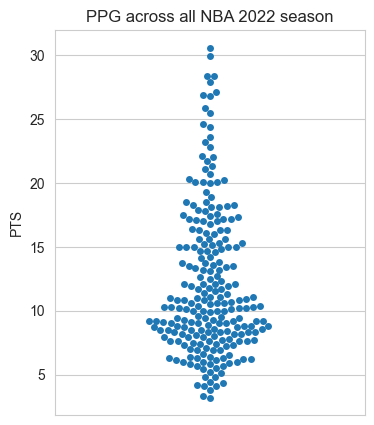

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(4,5))
plt.title('PPG across all NBA 2022 season')
sns.swarmplot(df.PTS[df.G >= 58])

We can see that most players fall into the 6 to the 12 points range

Also shows us the 2 elite scorers in the season that reached the 30 ppg barrier

Also a interesting note is the two players that make around 3-2 ppg but still played 58 or more games

In [12]:
df[df.G >= 58].sort_values('PTS', ascending=False)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
162,Joel Embiid,C,27,PHI,68,68,33.8,9.8,19.6,0.499,...,0.814,2.1,9.6,11.7,4.2,1.1,1.5,3.1,2.7,30.6
12,Giannis Antetokounmpo,PF,27,MIL,67,67,32.9,10.3,18.6,0.553,...,0.722,2.0,9.6,11.6,5.8,1.1,1.4,3.3,3.2,29.9
602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,0.460,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
141,Luka Dončić,PG,22,DAL,65,65,35.4,9.9,21.6,0.457,...,0.744,0.9,8.3,9.1,8.7,1.2,0.6,4.5,2.2,28.4
134,DeMar DeRozan,PF,32,CHI,76,76,36.1,10.2,20.2,0.504,...,0.877,0.7,4.4,5.2,4.9,0.9,0.3,2.4,2.3,27.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,Frank Ntilikina,SG,23,DAL,58,5,11.8,1.5,3.8,0.399,...,0.960,0.2,1.2,1.4,1.2,0.5,0.1,0.5,1.1,4.1
545,Juan Toscano-Anderson,SF,28,GSW,73,6,13.6,1.6,3.2,0.489,...,0.571,0.4,2.0,2.4,1.7,0.7,0.2,0.9,1.6,4.1
372,Jordan McLaughlin,PG,25,MIN,62,3,14.5,1.4,3.2,0.440,...,0.750,0.4,1.2,1.5,2.9,0.9,0.2,0.6,0.9,3.8


Here we can see who are those players

### So, why stop it there when we can make a plot for every major statiscal category?

<AxesSubplot: title={'center': 'TOV'}, ylabel='TOV'>

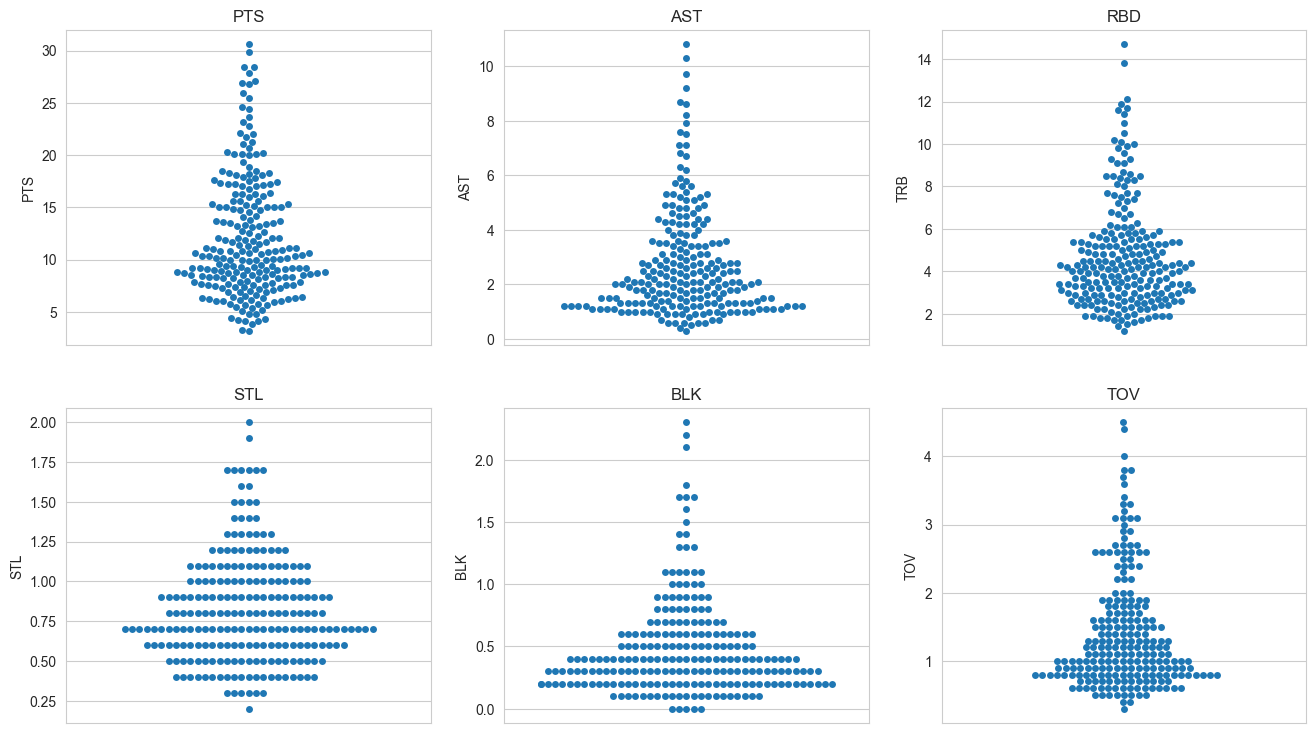

In [13]:
fig, ax = plt.subplots(2,3, figsize=(16,9))

ax[0][0].set_title('PTS')
sns.swarmplot(df.PTS[df.G >= 58], ax=ax[0][0])

ax[0][1].set_title('AST')
sns.swarmplot(df.AST[df.G >= 58], ax=ax[0][1])

ax[0][2].set_title('RBD')
sns.swarmplot(df.TRB[df.G >= 58], ax=ax[0][2])

ax[1][0].set_title('STL')
sns.swarmplot(df.STL[df.G >= 58], ax=ax[1][0])

ax[1][1].set_title('BLK')
sns.swarmplot(df.BLK[df.G >= 58], ax=ax[1][1])

ax[1][2].set_title('TOV')
sns.swarmplot(df.TOV[df.G >= 58], ax=ax[1][2])

Very interesting seeing where everyone falls and all outliers, specially in rebounds, blocks, turnovers and steals, where there are players way ahed of the pack

Also, if want to see who is these players, check basketball reference, the url is at the start of this notebook

### Since we are all fancy with plots, we can make one image showing scatter plots with correlations for every statistic

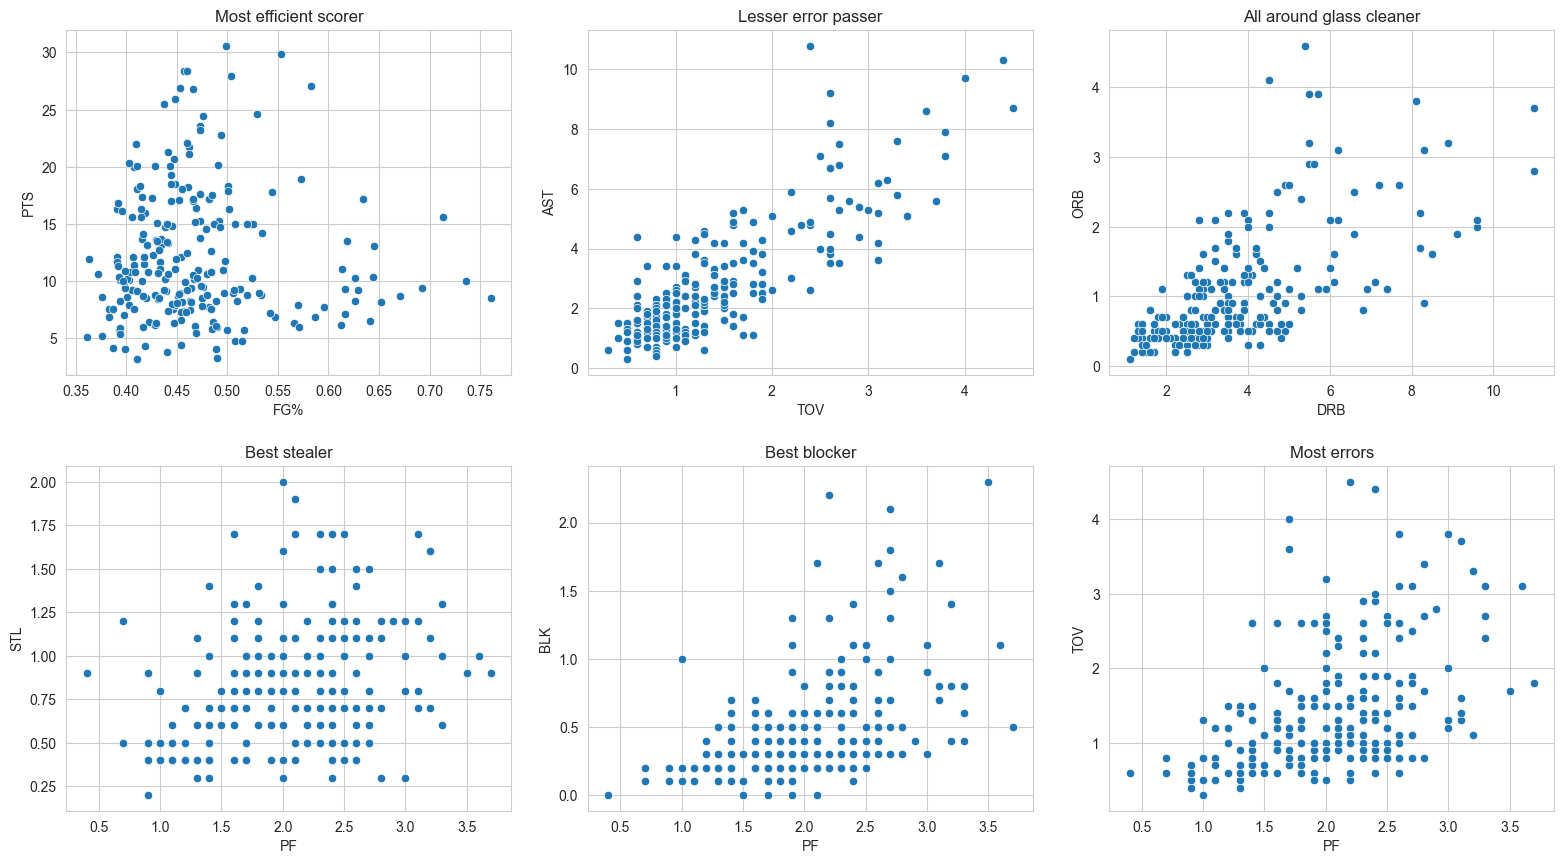

In [14]:
fig, ax = plt.subplots(2,3, figsize=(16,9))

ax[0][0].set_title('Most efficient scorer')
sns.scatterplot(df[df.G >= 58], x='FG%', y='PTS', ax=ax[0][0])

ax[0][1].set_title('Lesser error passer')
sns.scatterplot(df[df.G >= 58], x='TOV', y='AST', ax=ax[0][1])

ax[0][2].set_title('All around glass cleaner')
sns.scatterplot(df[df.G >= 58], x='DRB', y='ORB', ax=ax[0][2])

ax[1][0].set_title('Best stealer')
sns.scatterplot(df[df.G >= 58], x='PF', y='STL', ax=ax[1][0])

ax[1][1].set_title('Best blocker')
sns.scatterplot(df[df.G >= 58], x='PF', y='BLK', ax=ax[1][1])

ax[1][2].set_title('Most errors')
sns.scatterplot(df[df.G >= 58], x='PF', y='TOV', ax=ax[1][2])

plt.tight_layout(pad=2)

Now we start to really see the outliers, the ones who are ahead of the pack